In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

### kaggle의 porto-seguro-safe-driver-prediction 데이터 이용
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

In [2]:
train=pd.read_csv("./car_insurance/train.csv")
test=pd.read_csv("./car_insurance/test.csv")

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
train.target.unique()  #범주형

array([0, 1], dtype=int64)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [11]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#train 데이터의 결측치 측정

train.isnull().any().any()

False

 "Values of -1 indicate that the feature was missing from the observation".

-1의 값은 기능이 관측치에서 누락되었음을 나타냅니다.

In [6]:
s=0
for i in train.columns:
    print(s,  i)
    s=s+1

0 id
1 target
2 ps_ind_01
3 ps_ind_02_cat
4 ps_ind_03
5 ps_ind_04_cat
6 ps_ind_05_cat
7 ps_ind_06_bin
8 ps_ind_07_bin
9 ps_ind_08_bin
10 ps_ind_09_bin
11 ps_ind_10_bin
12 ps_ind_11_bin
13 ps_ind_12_bin
14 ps_ind_13_bin
15 ps_ind_14
16 ps_ind_15
17 ps_ind_16_bin
18 ps_ind_17_bin
19 ps_ind_18_bin
20 ps_reg_01
21 ps_reg_02
22 ps_reg_03
23 ps_car_01_cat
24 ps_car_02_cat
25 ps_car_03_cat
26 ps_car_04_cat
27 ps_car_05_cat
28 ps_car_06_cat
29 ps_car_07_cat
30 ps_car_08_cat
31 ps_car_09_cat
32 ps_car_10_cat
33 ps_car_11_cat
34 ps_car_11
35 ps_car_12
36 ps_car_13
37 ps_car_14
38 ps_car_15
39 ps_calc_01
40 ps_calc_02
41 ps_calc_03
42 ps_calc_04
43 ps_calc_05
44 ps_calc_06
45 ps_calc_07
46 ps_calc_08
47 ps_calc_09
48 ps_calc_10
49 ps_calc_11
50 ps_calc_12
51 ps_calc_13
52 ps_calc_14
53 ps_calc_15_bin
54 ps_calc_16_bin
55 ps_calc_17_bin
56 ps_calc_18_bin
57 ps_calc_19_bin
58 ps_calc_20_bin


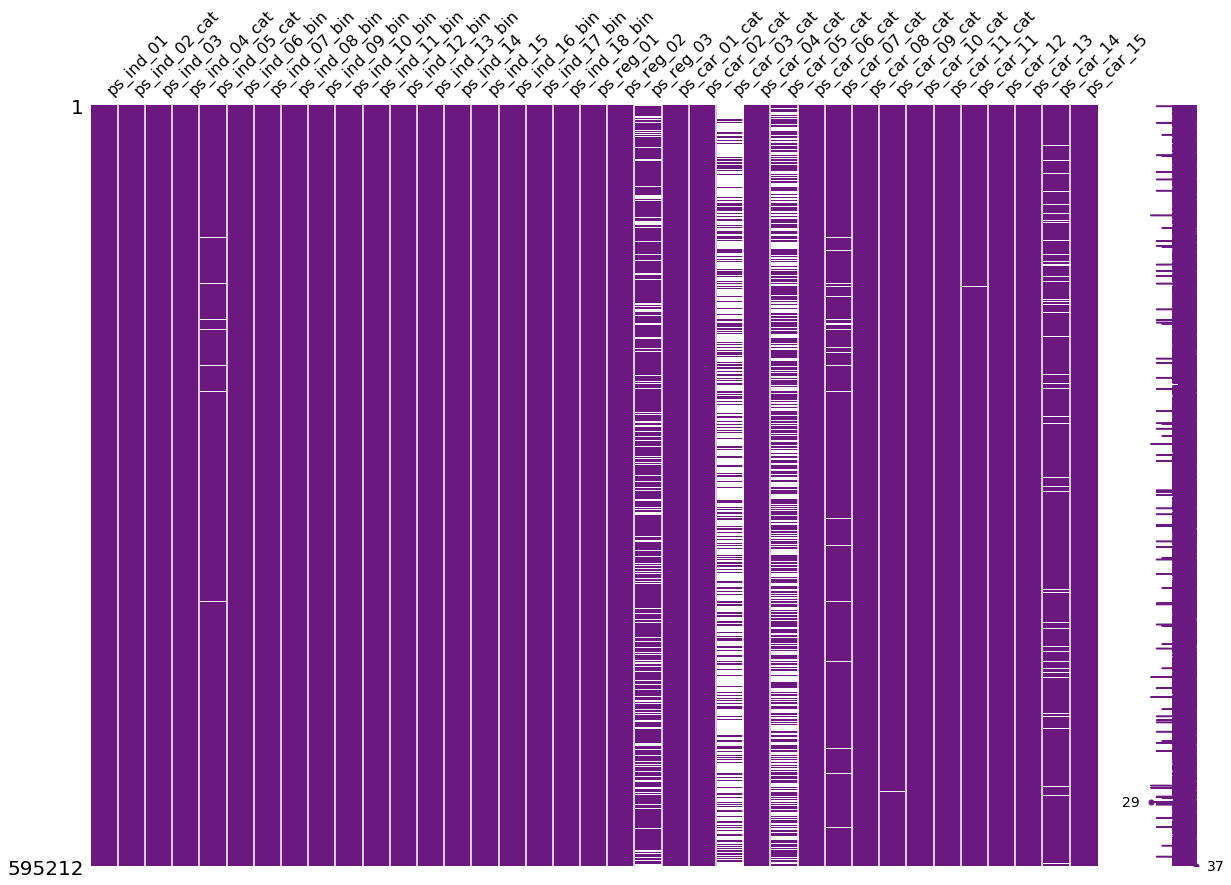

In [4]:
train_copy=train
train_copy=train_copy.replace(-1,np.NaN)



import missingno as msno

msno.matrix(df=train_copy.iloc[:,2:39],figsize=(20,14),color=(0.42,0.1,0.5))

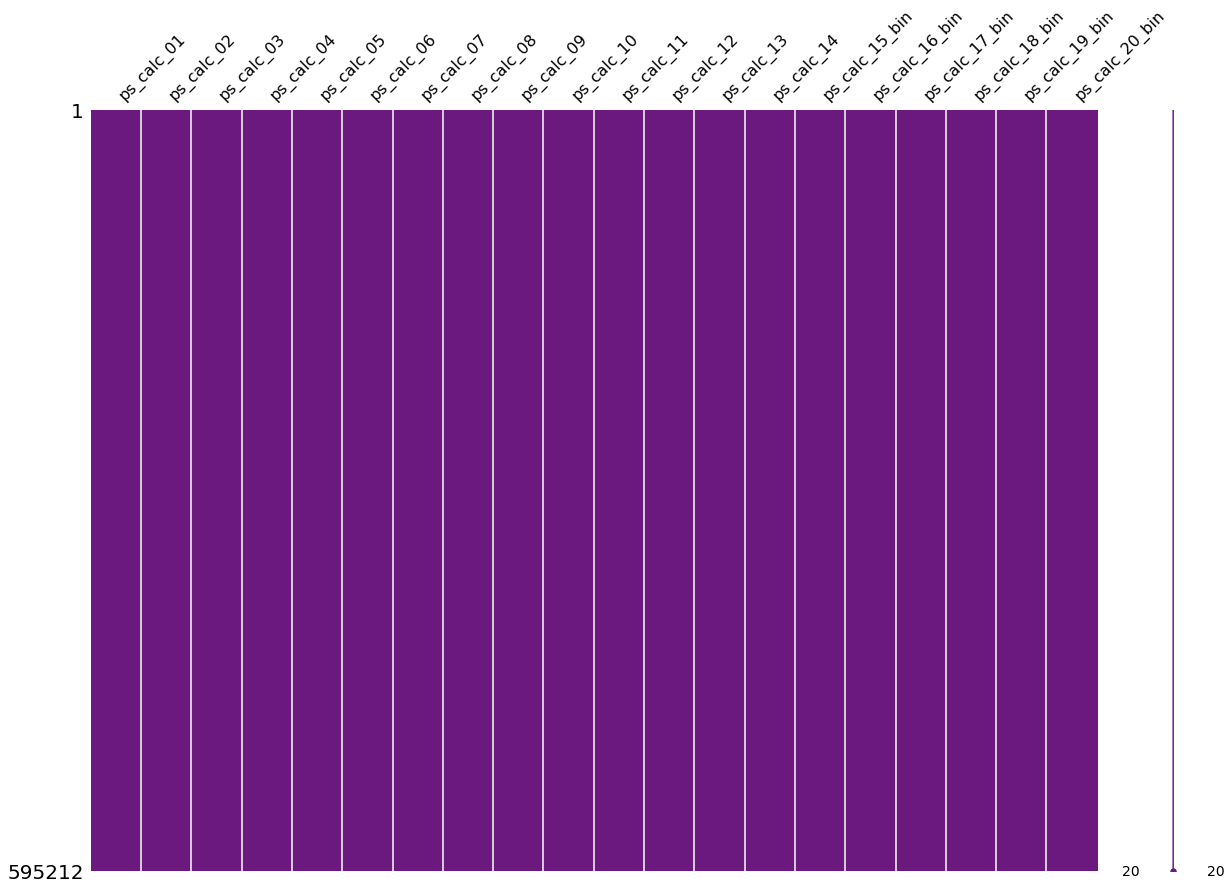

In [12]:
msno.matrix(df=train_copy.iloc[:,39:],figsize=(20,14),color=(0.42,0.1,0.5))

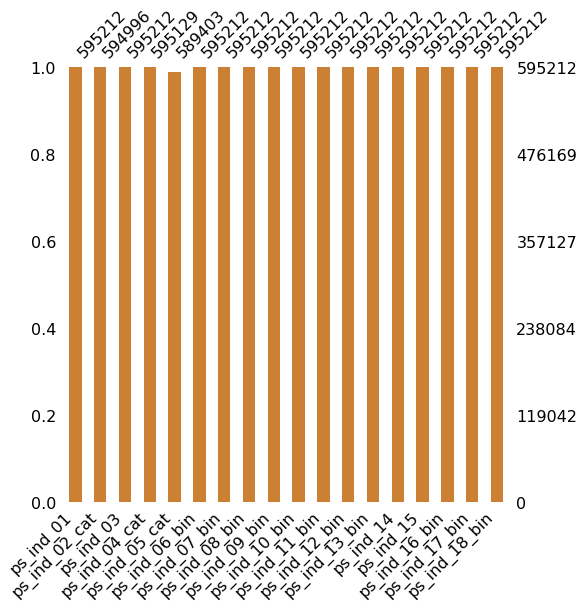

In [15]:
msno.bar(df=train_copy.iloc[:,2:20],figsize=(8,8), color=(0.8,0.5,0.2))

# ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat

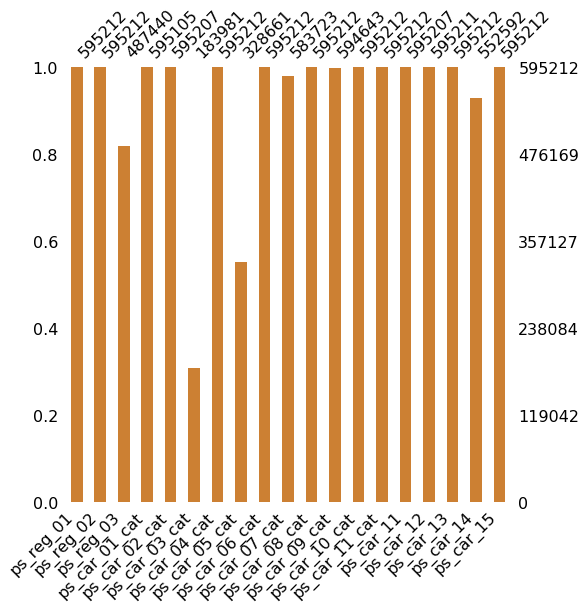

In [17]:
msno.bar(df=train_copy.iloc[:,20:39],figsize=(8,8), color=(0.8,0.5,0.2))

# ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_09_cat, ps_car_11, ps_car_12,ps_car_14


In [29]:
for col in train_copy.columns:
    if train_copy[col].isnull().sum()!=0:
         print(col,' '*(15-len(col)), train_copy[col].isnull().sum())

ps_ind_02_cat    216
ps_ind_04_cat    83
ps_ind_05_cat    5809
ps_reg_03        107772
ps_car_01_cat    107
ps_car_02_cat    5
ps_car_03_cat    411231
ps_car_05_cat    266551
ps_car_07_cat    11489
ps_car_09_cat    569
ps_car_11        5
ps_car_12        1
ps_car_14        42620


In [30]:
data = [go.Bar( x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'    )]

layout = go.Layout(title='Target variable distribution')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [31]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [32]:
#dtypes: float64(10), int64(49) 별로 나누기

train_float=train.select_dtypes(include=["float64"])
train_int=train.select_dtypes(include=["int64"])

# Correlation plots

In [33]:
#dtype별로 히트맵

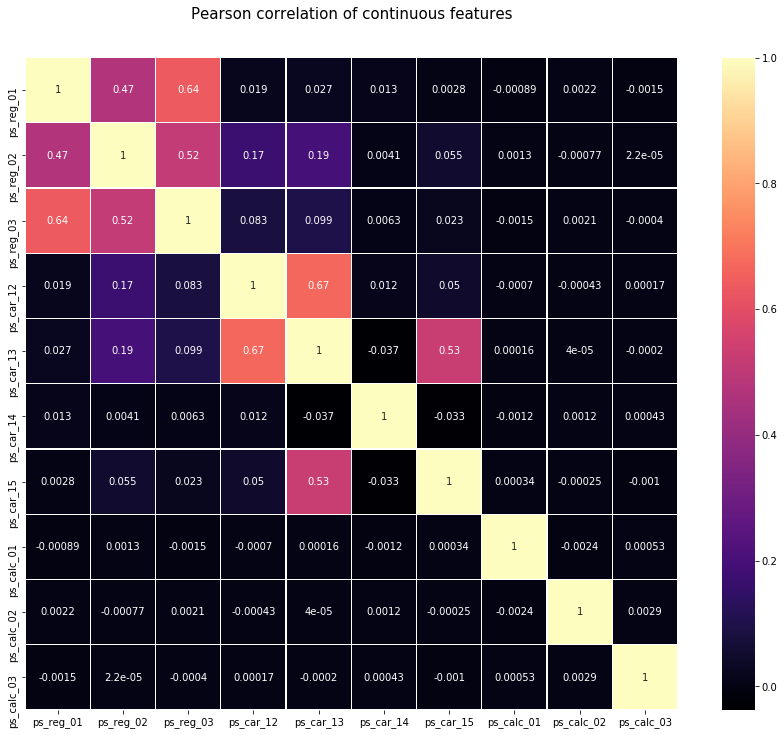

In [34]:
colormap=plt.cm.magma

plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)

sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0,square=True,
           cmap=colormap, linecolor="white",annot=True)

### 상관관계 p-values>0.5인 것을 보면 

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

In [40]:
train_int = train_int.drop(["id", "target"], axis=1)

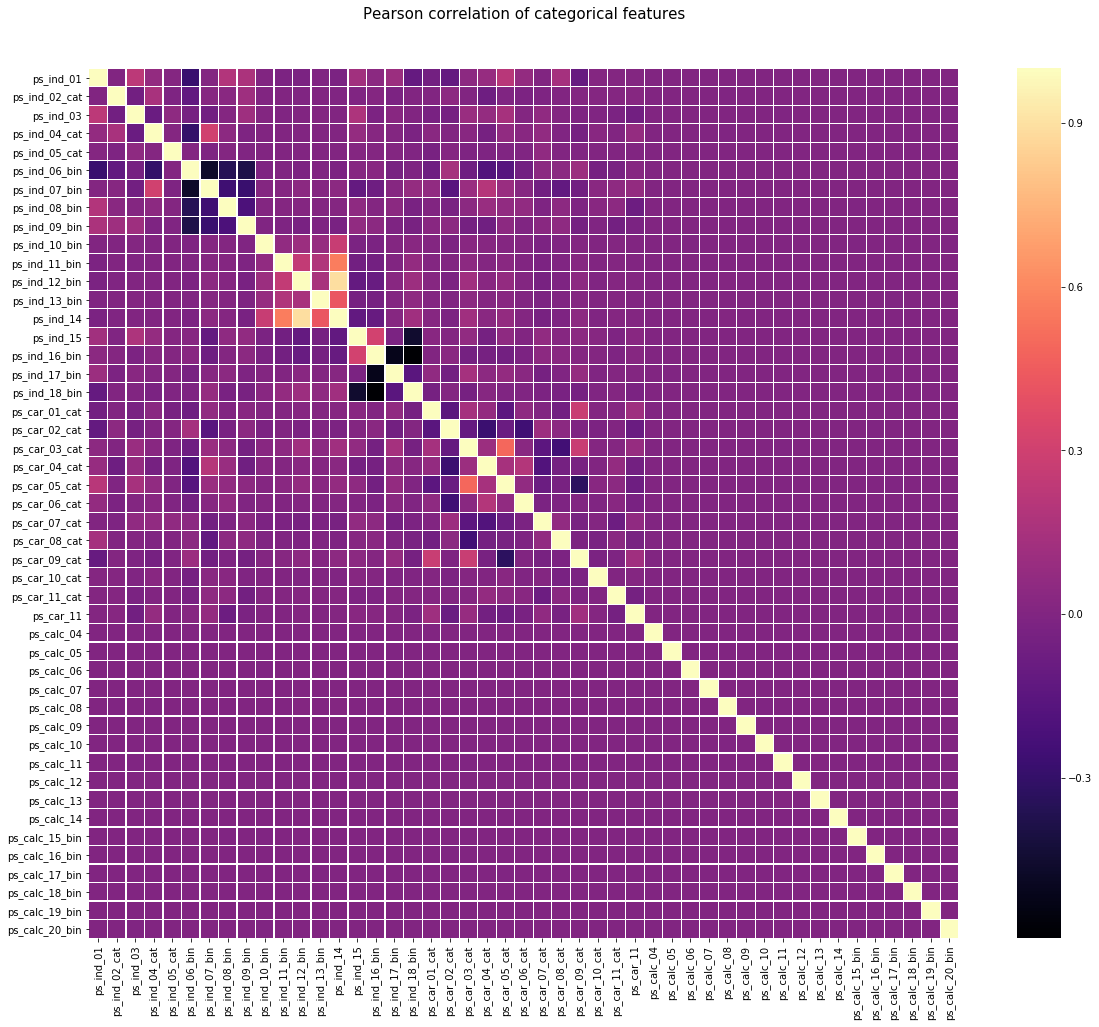

In [41]:
colormap = plt.cm.magma
plt.figure(figsize=(21,16))
plt.title('Pearson correlation of categorical features', y=1.05, size=15)
sns.heatmap(train_int.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=False)

#잘 안보이니까 컬럼을 나눠서 보자

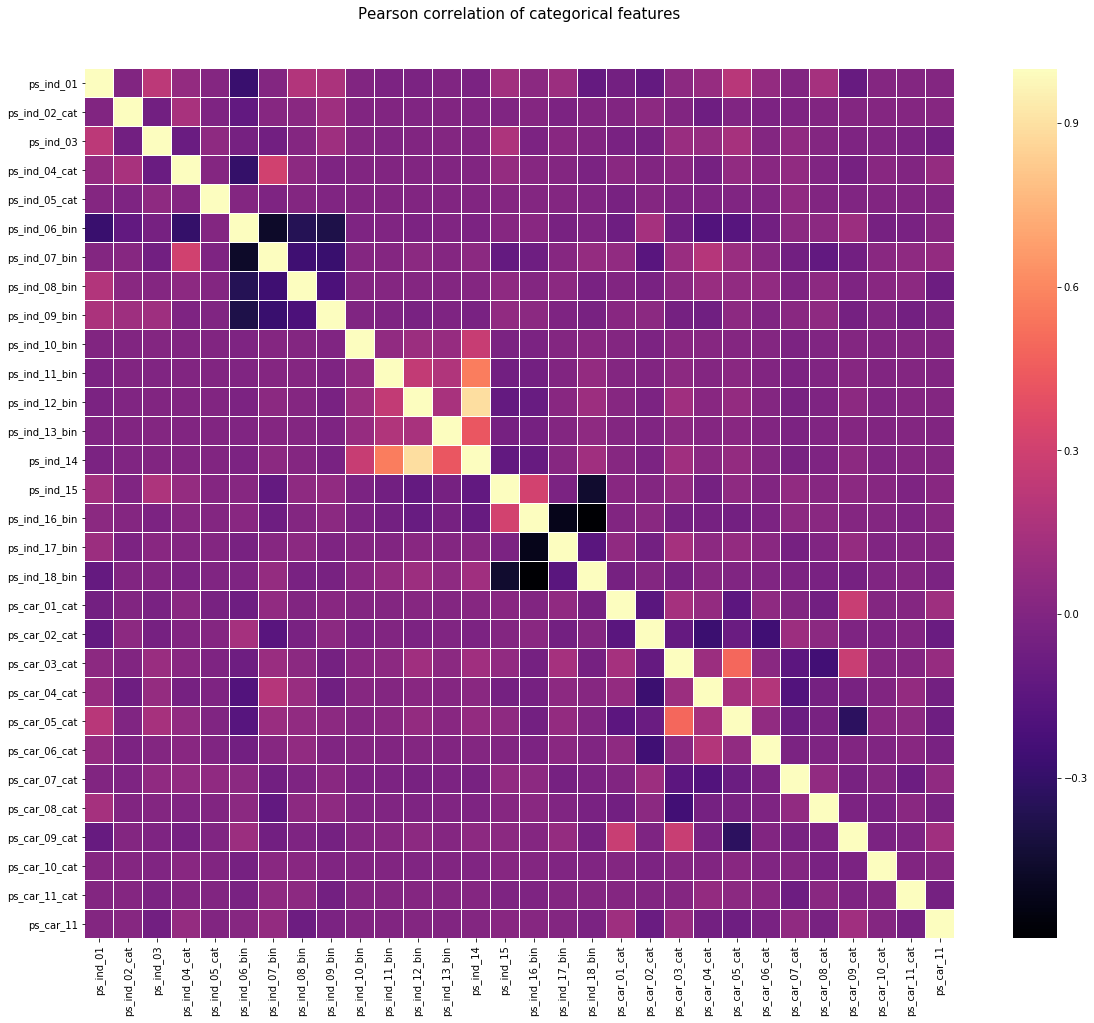

In [42]:

colormap = plt.cm.magma
plt.figure(figsize=(21,16))
plt.title('Pearson correlation of categorical features', y=1.05, size=15)
sns.heatmap(train_int.iloc[:,:30].corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=False)

#### 그런데 여기서 train_float와 다른점은 negative correlation이 존재

이를 위해 다음을 나타낸다.

In [45]:
data = [go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        )]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Negatively correlated features  

#### (ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin)

#### (ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin)

# Binary features inspection

In [49]:
bin_col = [col for col in train.columns if '_bin' in col]
bin_col
#(뽑고싶은 것) for (무엇을 in 어디서) if (조건)

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [47]:
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [50]:
# 한 컬럼을 다른점으로 나눠서 한 막대그래프에 표현


#각 조건별로 trace나누기
trace1 = go.Bar(x=bin_col,
    y=zero_list ,
    name='Zero count')

trace2 = go.Bar(x=bin_col,
    y=one_list,
    name='One count')

#하나의 막대그래프로 묶기
data = [trace1, trace2]
layout = go.Layout(barmode='stack',
    title='Count of 1 and 0 in binary variables')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

# Categorical features inspection

In [55]:
cat_col = [col for col in train.columns if '_cat' in col]

print(len(cat_col))  #이중 결측치가 10개
cat_col
#(뽑고싶은 것) for (무엇을 in 어디서) if (조건)

14


['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [52]:
zero_list = []
one_list = []
for col in cat_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [53]:
# 한 컬럼을 다른점으로 나눠서 한 막대그래프에 표현


#각 조건별로 trace나누기
trace1 = go.Bar(x=cat_col,
    y=zero_list ,
    name='Zero count')

trace2 = go.Bar(x=cat_col,
    y=one_list,
    name='One count')

#하나의 막대그래프로 묶기
data = [trace1, trace2]
layout = go.Layout(barmode='stack',
    title='Count of 1 and 0 in categorical variables')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

# building the model and Predict

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
x=train.drop(['id', 'target'],axis=1)
y=train.target

x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model=RandomForestClassifier()

model.fit(x_train,y_train)

pred=model.predict(x_val)

In [13]:
from sklearn import metrics

print('총 {}명 중 {:.2f}% 정확도로 보험가입여부를 맞춤'.format(y_val.shape[0], 
                                           100 * metrics.accuracy_score(pred, y_val)))

총 148803명 중 96.38% 정확도로 보험가입여부를 맞춤


In [15]:
# train_copy에 관해서는?

In [16]:
for col in train_copy.columns:
    if train_copy[col].isnull().sum()!=0:
         print(col,' '*(15-len(col)), train_copy[col].isnull().sum())

ps_ind_02_cat    216
ps_ind_04_cat    83
ps_ind_05_cat    5809
ps_reg_03        107772
ps_car_01_cat    107
ps_car_02_cat    5
ps_car_03_cat    411231
ps_car_05_cat    266551
ps_car_07_cat    11489
ps_car_09_cat    569
ps_car_11        5
ps_car_12        1
ps_car_14        42620


In [18]:
#너무 많은 결측치를 가지고 있는 것은 아예 제외

train_copy=train_copy.drop(["ps_reg_03","ps_car_03_cat","ps_car_05_cat",
                           "ps_car_07_cat","ps_car_14"],axis=1)

In [34]:
#수가 적은 것은 임의로 넣어주기

train_copy.ps_car_02_cat=train_copy.ps_car_02_cat.fillna(train_copy.ps_car_02_cat.max());

train_copy.ps_car_11=train_copy.ps_car_11.fillna(train_copy.ps_car_11.median());

train_copy.ps_car_12=train_copy.ps_car_12.fillna(train_copy.ps_car_12.max());

In [38]:
for col in train_copy.columns:
    if train_copy[col].isnull().sum()!=0:
        train_copy[col]=train_copy[col].fillna(train_copy[col].median())

In [39]:
x=train_copy.drop(['id', 'target'],axis=1)
y=train_copy.target

x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0)

In [40]:
model=RandomForestClassifier()

model.fit(x_train,y_train)

pred=model.predict(x_val)

In [41]:
print('총 {}명 중 {:.2f}% 정확도로 보험가입여부를 맞춤'.format(y_val.shape[0], 
                                           100 * metrics.accuracy_score(pred, y_val)))

총 148803명 중 96.38% 정확도로 보험가입여부를 맞춤


In [48]:
#차이가 없군

## Bagging과 Boosting의 차이

https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

# Feature importance via Random Forest


### [ Bagging ]

In [49]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(x_train,y_train)

features = train.drop(['id', 'target'],axis=1).columns.values

In [52]:
# Scatter plot 
trace = go.Scatter(x = features, y = model.feature_importances_,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale=True),
    text = features)


data = [trace]

layout= go.Layout(autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
        ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2),
    showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [53]:
x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), 
                                                            reverse = False)))

trace2 = go.Bar(x=x ,y=y,
    marker=dict(color=x,
        colorscale = 'Viridis',
        reversescale = True),
    name='Random Forest Feature importance',
    orientation='h',)


layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,))


fig1 = go.Figure(data=[trace2])

fig1['layout'].update(layout)

py.iplot(fig1, filename='plots')

# Feature importance via Gradient Boosting model

### [Boosting]

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
model=GradientBoostingClassifier()

model.fit(x_train,y_train)

features = train.drop(['id', 'target'],axis=1).columns.values

In [67]:
# Scatter plot 
trace = go.Scatter(x = features, y = model.feature_importances_,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale=True),
    text = features)


data = [trace]

layout= go.Layout(autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
        ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2),
    showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [68]:
x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), 
                                                            reverse = False)))

trace2 = go.Bar(x=x ,y=y,
    marker=dict(color=x,
        colorscale = 'Viridis',
        reversescale = True),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',)


layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,))


fig1 = go.Figure(data=[trace2])

fig1['layout'].update(layout)

py.iplot(fig1, filename='plots')